In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import json

from wordcloud import WordCloud
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [2]:
tweets_data_path = '/home/hssahrul/Dropbox/PAPER/PKM 2018/Program/twitter_data.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

print(len(tweets_data))

set_of_jsons = {json.dumps(d, sort_keys=True) for d in tweets_data}
tweets_data = [json.loads(t) for t in set_of_jsons]

print(len(tweets_data))

43721
36727


In [3]:
tweets = pd.DataFrame()
tweets["Text_1"] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data))

In [4]:
def visualization(tweets1):
    tweets_by_lang = tweets1['lang'].value_counts()
    fig, ax = plt.subplots()
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_xlabel('Languages', fontsize=15)
    ax.set_ylabel('Number of tweets' , fontsize=15)
    ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
    tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')
    
    tweets_by_country = tweets1['country'].value_counts()

    fig, ax = plt.subplots()
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_xlabel('Countries', fontsize=15)
    ax.set_ylabel('Number of tweets' , fontsize=15)
    ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
    tweets_by_country[:10].plot(ax=ax, kind='bar', color='blue')


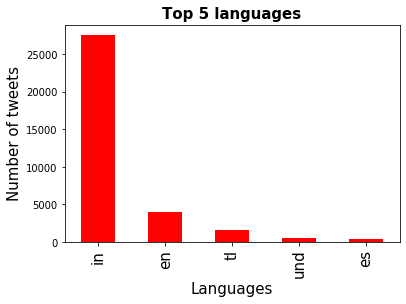

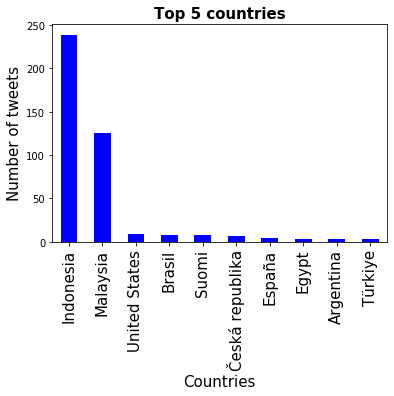

In [5]:
visualization(tweets)

In [6]:
tweets = tweets[(tweets['lang'] == 'in') & 
                ((tweets['country'] == 'Indonesia') | (tweets['country'].isna()))]
tweets.drop(['lang'], axis=1, inplace=True)
tweets.drop(['country'], axis=1, inplace=True)
print(tweets.shape[0])
tweets = tweets.reset_index()
tweets.drop(['index'], axis=1, inplace=True)
tweets.head(10)

27468


Text_1
0  RT @ketekcowo: Bangsat! memek dowernya indah s...
1  Yang penting just doakan yang terbaik . Itu ya...
2               @DOYEONodds Lo coba stalk deh anjir.
3  RT @AmirRozali: Gila bapak ramai ni avengers p...
4  Babi apa sesat jalan sampai kubur cina kol 12 ...
5  RT @thepopoh: 👵 : kamu gendutan...\n👩 : iya do...
6      @ryxxfa @SullivanPradana goblog kena azab ...
7  RT @akashisedai: Astaghfirullah...apaan nih??\...
8  RT @s2pidisyou: @askmenfess ini jahat bgt bapa...
9  RT @zaki_elqattamy: Beramal krn riya itu jelek...

In [7]:
stopword = StopWordRemoverFactory().create_stop_word_remover()
stemmer = StemmerFactory().create_stemmer()

In [8]:
text = []

for i in range(0, tweets.shape[0]):
    temp = tweets["Text_1"].astype(str)[i]
    temp = re.sub(r' +', ' ', temp).lower()
    temp = re.sub(r"http\S+", "", temp)
    temp = re.sub(r'@[^\s]+','', temp)
    temp = re.sub(r'#[^\s]+','', temp)
    temp = re.sub(r'[0-9]+', '', temp)
    temp = re.sub(r'[^\w\s]',' ', temp)
    temp = temp.replace(r"", "")
    temp = temp.replace(r" gobluk ", " goblok ")
    temp = temp.replace(r" aing ", " gue ")
    temp = temp.replace(r" gua ", " gue ")
    temp = temp.replace(r" w ", " gue ")
    temp = temp.replace(r" gw ", " gue ")
    temp = temp.replace(r" gue ", " ")
    temp = temp.replace(r" yg ", " yang ")
    temp = temp.replace(r" lo ", " lu ")
    temp = temp.replace(r"rt ", " ")
    temp = temp.replace(r" ga ", " gak ")
    temp = temp.replace(r" gk ", " gak ")
    temp = temp.replace(r" gak ", " ")
    temp = temp.replace(r" tp ", " tapi ")
    temp = temp.replace(r" mmg ", " memang ")
    temp = temp.replace(r" pict ", " gambar ")
    temp = temp.replace(r" mkn ", " makan ")
    temp = temp.replace(r" anjir ", " anjing ")
    temp = temp.replace(r"anjir ", " anjing ")
    temp = temp.replace(r" anying ", " anjing ")
    temp = temp.replace(r" aja ", " ")
    temp = temp.replace(r" sih ", " ")
    temp = re.sub(r' +', ' ', temp)
    temp = stemmer.stem(temp)
    temp = stopword.remove(temp)
    
    text.append(temp)

df = pd.DataFrame(data=text, columns=["Text_2"])
df.head(10)

Text_2
0                          bangsat memek dower indah
1                           just doa even perit gila
2                           lu coba stalk deh anjing
3                    gila ramai ni avengers kalah ni
4              babi sesat jalan kubur cina kol mcmni
5  gendut iya dooong budhee neng neng dooong kese...
6                                        goblog azab
7  astaghfirullah nih napa lu ketawa kutil gebleg...
8                              jahat bgt anjing wkwk
9  amal krn riya jelek lbh jelek lg kau amal krn ...

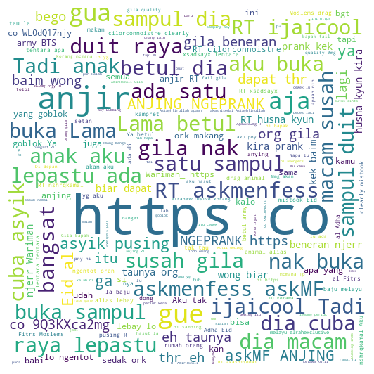

In [9]:
a = ' '.join(list(tweets['Text_1']))
b = WordCloud(width = 512, height = 512, background_color="white").generate(a)
plt.figure(figsize = (5, 5))
plt.imshow(b)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

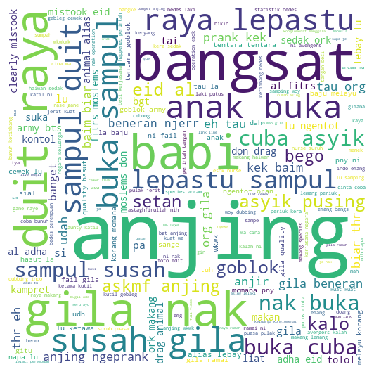

In [10]:
a = ' '.join(list(df['Text_2']))
b = WordCloud(width = 512, height = 512, background_color="white").generate(a)
plt.figure(figsize = (5, 5))
plt.imshow(b)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [11]:
df = pd.concat([tweets, df], axis=1)
df.drop_duplicates(subset="Text_2", keep="first", inplace=True)
print(df.shape[0])
df.head(10)

16731


Text_1  \
0  RT @ketekcowo: Bangsat! memek dowernya indah s...   
1  Yang penting just doakan yang terbaik . Itu ya...   
2               @DOYEONodds Lo coba stalk deh anjir.   
3  RT @AmirRozali: Gila bapak ramai ni avengers p...   
4  Babi apa sesat jalan sampai kubur cina kol 12 ...   
5  RT @thepopoh: 👵 : kamu gendutan...\n👩 : iya do...   
6      @ryxxfa @SullivanPradana goblog kena azab ...   
7  RT @akashisedai: Astaghfirullah...apaan nih??\...   
8  RT @s2pidisyou: @askmenfess ini jahat bgt bapa...   
9  RT @zaki_elqattamy: Beramal krn riya itu jelek...   

                                              Text_2  
0                          bangsat memek dower indah  
1                           just doa even perit gila  
2                           lu coba stalk deh anjing  
3                    gila ramai ni avengers kalah ni  
4              babi sesat jalan kubur cina kol mcmni  
5  gendut iya dooong budhee neng neng dooong kese...  
6                                        goblog azab  
7  astaghfirullah nih napa lu ketawa kutil gebleg...  
8                              jahat bgt anjing wkwk  
9  amal krn riya jelek lbh jelek lg kau amal krn ...

In [12]:
df.to_csv("../Dataset/unlabeled-data.csv", index=False)